
## MED 3

# Regresja wielomianowa

Wczytanie niezbędnych bibliotek


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os as os
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# 1. Wprowadzenie teoretyczne

Celem regresji wielomianowej jest dopasowanie do danych doświadczalnych/historycznych wykresu funkcji, która oddaje charakter tych danych. 

Zadanie polega na znalezieniu wielomianu $\hat{f}(x)$ postaci:

$$\hat{f}(x)=w_0+w_1 x^1+w_2x^2+ … +w_n x^n,$$

gdzie $x \in R$, a $w∈R^N$ jest wektorem zawierającym współczynniki wielomianu. 

To właśnie na znalezieniu wektora $w$ będziemy skupiać uwagę.

Mając dane historyczne  $X={x_1,x_2,…,x_k}$ oraz odpowiadające im wartości $Y={y_1,y_2,…,y_k}$ będziemy poszukiwać najlepiej dopasowanego wektora $w$. Co to dla nas znaczy?

W efekcie musimy znaleźć takie parametry modelu (wielomianu), które zminimalizują nam sumę kwadratów błędu (RSE). 

Czyli takiego, dla którego wartości zwracane przez funkcję $\hat{f}$ i odpowiadające im wartości rzeczywiste najmniej się różnią. 
Załóżmy, że mamy już wybrany wektor np. $w=[1,0.5,0,0,2,0.3,…,1]$ 
możemy obliczyć:

$$\hat{f}(x_1)=w_0 + w_1x_1^1+w_2x_1^2+...+w_nx_1^n$$

$$\hat{f}(x_2)=w_0 + w_1x_2^1+w_2x_2^2+...+w_nx_2^n$$

$$\vdots$$

$$\hat{f}(x_k)=w_0 + w_1x_k^1+w_2x_k^2+...+w_nx_k^n$$

Błąd dopasowania możemy wyliczyć poprzez porównanie wartości otrzymanej dla danego argumentu $\hat{f}(x_i)$ z wartością rzeczywistą $y_i$ odpowiadającą temu argumentowi, stąd mamy

$$e^1=\hat{f}(x_1)−y_1$$
$$e^2=\hat{f}(x_2)−y_2$$
$$\vdots$$
$$e^k=\hat{f}(x_k)−y_k$$


Następnie sumując kwadraty błędów $e^1, … , e^k$ otrzymujemy wartość błędów dla danych parametrów modelu:

$$E(w)=\sum_{i=1}^k\left(\hat{f}(x_i)−y_i\right)^2$$

Chcemy aby suma kwadratów błędów była jak najmniejsza dla danego stopnia wielomianu, a to co możemy zmieniać to wartości współczynników wektora $w$. 

Powyższe analizy możmy zapisać w postaci macierzowej.
$$ X  w = Y ,$$ gdzie

$$X = \left|\begin{array}{cccc}
1&x_1&...&x_1^n\\
1&x_2&...&x_2^n\\
\vdots&\vdots&\vdots&\vdots\\
1&x_k&...&x_k^n\end{array}\right|, $$

$$w = \left|\begin{array}{c}
w_0\\
w_1\\
...\\
w_n\end{array}\right|, $$


$$Y = \left|\begin{array}{c}
y_0\\
y_1\\
...\\
y_k\end{array}\right|. $$

Ponieważ w ogólnym przypadku macierz $X$ jest macierzą prostokątną, więc nie można jej odwrócić (nie da się wyzerować błędu aproksymacji), za to możemy znaleźć rozwiązanie przybliżone (takie, które minimalizuje nasz błąd):

$$\min_w||Xw−Y||_2^2$$

Rozwiązaniem, które jest w stanie zminimalizować nam sumę kwadratów błędu jest równanie:

$$ w=X^+Y,$$ 

gdzie $X^+$ jest pseudoodwrotnością macierzy $X$.

# 2. Od korelacji do prostej regresji liniowej

Miara korelacji (Pearsona) pozwala na stwierdzenie stopnia zależności liniowej atrybutów (cech). Dla przypomnienia - zbiór `iris`

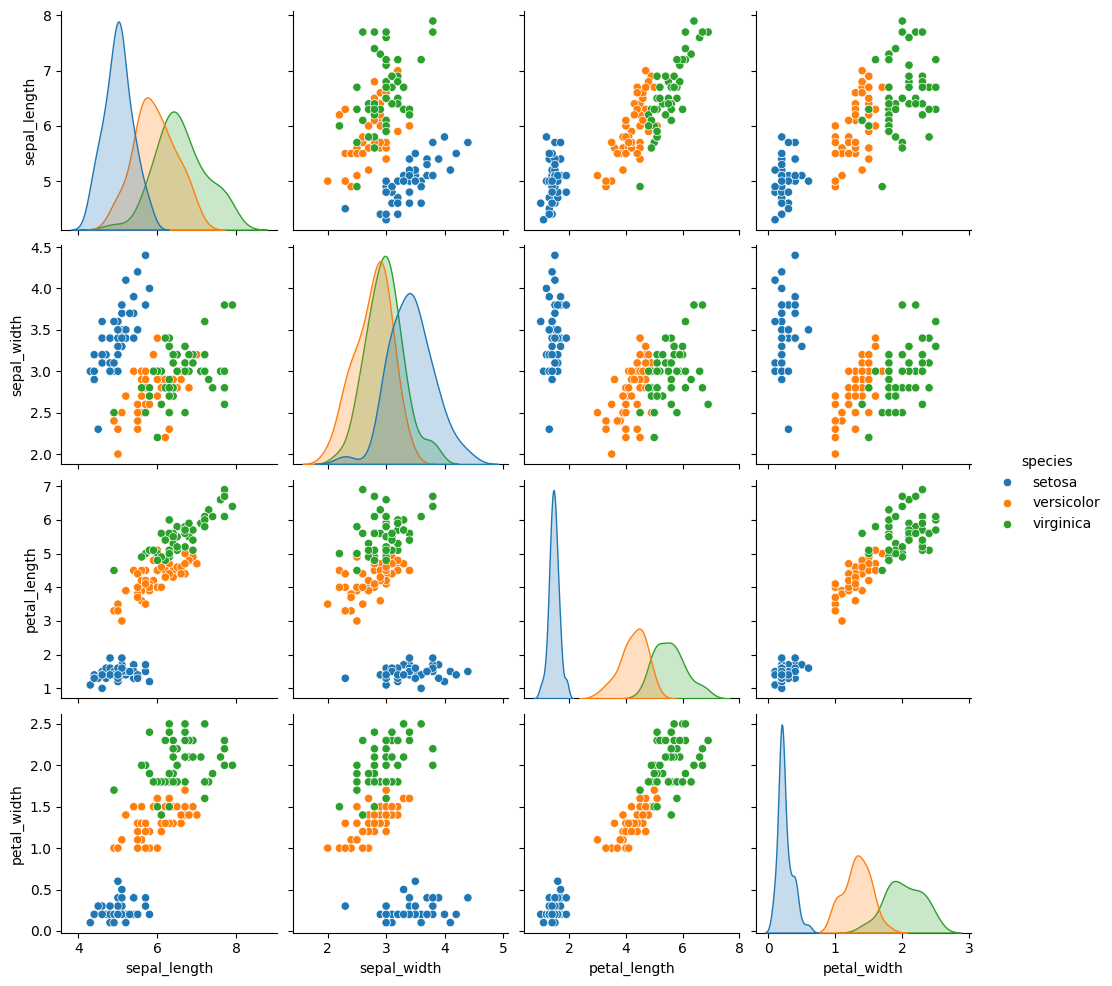

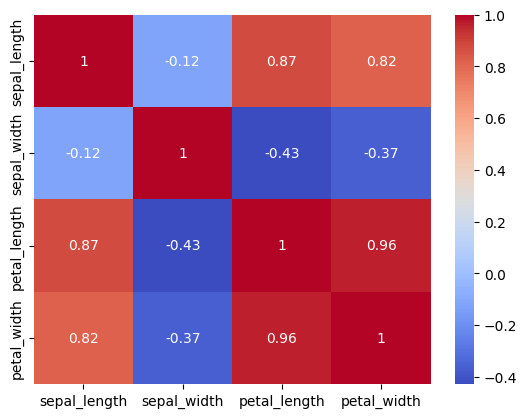

In [2]:

%matplotlib inline
# load iris dataset (sns is already imported in another cell)
iris = sns.load_dataset("iris")
iris.head()

# pairplot only for numeric variables, color by species
num_cols = iris.select_dtypes(include=[np.number]).columns
sns.pairplot(iris, vars=num_cols, kind="scatter", hue="species")
plt.show()

# compute correlation for numeric columns and display heatmap
sns.heatmap(iris[num_cols].corr(), annot=True, cmap='coolwarm')
plt.show()

> **Zadanie** Wskaż atrybuty najbardziej i najmniej skorelowane


# Najmniej skorelowane
Najmniej skorelowane ze sobą są parametry sepal_width i sepal_length. Druga najniższa korelacja występuje między sepal_width a petal_width. 
# Najbardziej skorelowane
Najbardziej skorelowane są petal_length i petal_width. Drugimi najbardziej skorelowanymi parametrami są sepal_length i petal_width.

Miara korelacji Pearsona odpowiada na pytanie *$czy$* (w jakim stopniu) dane atrybuty ($x,y$) są od siebie zależne liniowo. Odpowiedzi na pytanie *$jak$* od siebie zależą, udzieli model regresyjny. W tym przypadku będzie badany najprostszy model regresji wielomianowej tj. prosta regresja liniowa. Jej wynikiem jest linia prosta $$\hat y = \hat{f}(x) = w_0 + w_1 \cdot x,$$ która pozwala na oszacowanie wartości atrybutu $y$ na podstawie atrybutu $x$. 

Przykład - tworzenie modelu regresyjnego zależności czwartego atrybutu (petal width) od pierwszego (sepal length). Metoda `iloc` umożliwia odwołanie do elementów ramki danych przez ich indeksy, `values` konwertuje wynikową ramkę danych na postać wektora, `reshape` zamienia wektor na macierz o jednej kolumnie. `T` oznacza transpozycję, dzięki której łatwiej zmieścić wydruk w oknie.

In [3]:
x = iris.iloc[:,0].values.reshape(-1,1)
y = iris.iloc[:,3].values.reshape(-1,1)
print(x.T)
print(y.T)

[[5.1 4.9 4.7 4.6 5.  5.4 4.6 5.  4.4 4.9 5.4 4.8 4.8 4.3 5.8 5.7 5.4 5.1
  5.7 5.1 5.4 5.1 4.6 5.1 4.8 5.  5.  5.2 5.2 4.7 4.8 5.4 5.2 5.5 4.9 5.
  5.5 4.9 4.4 5.1 5.  4.5 4.4 5.  5.1 4.8 5.1 4.6 5.3 5.  7.  6.4 6.9 5.5
  6.5 5.7 6.3 4.9 6.6 5.2 5.  5.9 6.  6.1 5.6 6.7 5.6 5.8 6.2 5.6 5.9 6.1
  6.3 6.1 6.4 6.6 6.8 6.7 6.  5.7 5.5 5.5 5.8 6.  5.4 6.  6.7 6.3 5.6 5.5
  5.5 6.1 5.8 5.  5.6 5.7 5.7 6.2 5.1 5.7 6.3 5.8 7.1 6.3 6.5 7.6 4.9 7.3
  6.7 7.2 6.5 6.4 6.8 5.7 5.8 6.4 6.5 7.7 7.7 6.  6.9 5.6 7.7 6.3 6.7 7.2
  6.2 6.1 6.4 7.2 7.4 7.9 6.4 6.3 6.1 7.7 6.3 6.4 6.  6.9 6.7 6.9 5.8 6.8
  6.7 6.7 6.3 6.5 6.2 5.9]]
[[0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 0.2 0.2 0.1 0.1 0.2 0.4 0.4 0.3
  0.3 0.3 0.2 0.4 0.2 0.5 0.2 0.2 0.4 0.2 0.2 0.2 0.2 0.4 0.1 0.2 0.2 0.2
  0.2 0.1 0.2 0.2 0.3 0.3 0.2 0.6 0.4 0.3 0.2 0.2 0.2 0.2 1.4 1.5 1.5 1.3
  1.5 1.3 1.6 1.  1.3 1.4 1.  1.5 1.  1.4 1.3 1.4 1.5 1.  1.5 1.1 1.8 1.3
  1.5 1.2 1.3 1.4 1.4 1.7 1.5 1.  1.1 1.  1.2 1.6 1.5 1.6 1.5 1.3 1.3 1.3
  1.2 1.4 1

Tworzenie modelu regresyjnego.

In [4]:
regressor = LinearRegression()  
regressor.fit(x,y) 

LinearRegression()

Parametrami prostego modelu liniowego $\hat y = \hat{f}(x) = w_0 + w_1 \cdot x$ są $w_0$ (intercept) oraz $w_1$ (slope). W naszym modelu są one równe odpowiednio

In [5]:
# w0
print(regressor.intercept_)
# w1
print(regressor.coef_)

[-3.200215]
[[0.75291757]]


Znając funkcję $\hat{f}(x)$ modelu liniowego możemy dla wektora $x$ wyznaczyć przewidywane wartości $y$, które dla odróżnienia od rzeczywistych zostaną umieszczone w innym wektorze ($y_{pred}$).

In [6]:
y_pred = regressor.predict(x)
y_pred.T

array([[0.63966461, 0.48908109, 0.33849758, 0.26320582, 0.56437285,
        0.86553988, 0.26320582, 0.56437285, 0.11262231, 0.48908109,
        0.86553988, 0.41378933, 0.41378933, 0.03733055, 1.16670691,
        1.09141515, 0.86553988, 0.63966461, 1.09141515, 0.63966461,
        0.86553988, 0.63966461, 0.26320582, 0.63966461, 0.41378933,
        0.56437285, 0.56437285, 0.71495636, 0.71495636, 0.33849758,
        0.41378933, 0.86553988, 0.71495636, 0.94083163, 0.48908109,
        0.56437285, 0.94083163, 0.48908109, 0.11262231, 0.63966461,
        0.56437285, 0.18791406, 0.11262231, 0.56437285, 0.63966461,
        0.41378933, 0.63966461, 0.26320582, 0.79024812, 0.56437285,
        2.07020799, 1.61845745, 1.99491623, 0.94083163, 1.6937492 ,
        1.09141515, 1.54316569, 0.48908109, 1.76904096, 0.71495636,
        0.56437285, 1.24199866, 1.31729042, 1.39258218, 1.01612339,
        1.84433272, 1.01612339, 1.16670691, 1.46787393, 1.01612339,
        1.24199866, 1.39258218, 1.54316569, 1.39

Wizualizacja danych i prostej regresji.

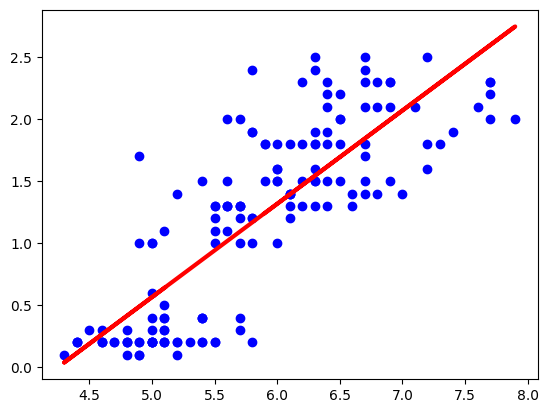

In [7]:
plt.scatter(x, y,  color='blue')
plt.plot(x, y_pred, color='red', linewidth=3)
plt.show()

Jakość modelu możemy ocenić wykorzystując np. bład średniokwadratowy: 

In [8]:
e = metrics.mean_squared_error(y, y_pred)
e

0.19101500769427357

> **Zadanie** Napisz funkcję, która zwróci parametry $w_0$ oraz $w_1$ modelu prostej regresji liniowej oraz $e$ wartość błędu średniokwadratowego dopasowania. Argumentem będzie ramka danych oraz numery dwóch atrybutów.

In [9]:
def calc1(dataframe, attr1, attr2) -> tuple:
    x = dataframe[attr1].values.reshape(-1,1)
    y = dataframe[attr2].values.reshape(-1,1)
    regressor = LinearRegression()  
    regressor.fit(x,y) 
    y_pred = regressor.predict(x)
    y_pred.T
    return regressor.intercept_, regressor.coef_, metrics.mean_squared_error(y, y_pred)

> **Zadanie** Korzystając z powyższej funkcji oceń modele regresyjne dla poszczególnych par atrybutów. Dla których par błąd dopasowania (obciążenie / bias) modelu jest największa, a dla których - najmniejsza. Czy można zauważyć zależność tej miary od miary korelacji ?

In [10]:
for attr1 in num_cols:
    for attr2 in num_cols:
        if attr1 != attr2:
            w0, w1, mse = calc1(iris, attr1, attr2)
            print(f"For attr1={attr1}, attr2={attr2} result is intercept={w0}, coef={w1}, mse={mse}")

For attr1=sepal_length, attr2=sepal_width result is intercept=[3.41894684], coef=[[-0.0618848]], mse=0.18610437589381357
For attr1=sepal_length, attr2=petal_length result is intercept=[-7.10144337], coef=[[1.85843298]], mse=0.7430610341321241
For attr1=sepal_length, attr2=petal_width result is intercept=[-3.200215], coef=[[0.75291757]], mse=0.19101500769427357
For attr1=sepal_width, attr2=sepal_length result is intercept=[6.52622255], coef=[[-0.22336106]], mse=0.6717073053166401
For attr1=sepal_width, attr2=petal_length result is intercept=[9.06315061], coef=[[-1.73522152]], mse=2.527289340028198
For attr1=sepal_width, attr2=petal_width result is intercept=[3.15687229], coef=[[-0.64027659]], mse=0.49976926485227013
For attr1=petal_length, attr2=sepal_length result is intercept=[4.30660342], coef=[[0.40892228]], mse=0.16350022510554504
For attr1=petal_length, attr2=sepal_width result is intercept=[3.45487448], coef=[[-0.1057853]], mse=0.1540725768226813
For attr1=petal_length, attr2=pet

# mse
- Największa wartość mse występuje dla atrybutów sepal_width, sepal_length, jest ona równa ~2,5. Ma to sens bo są one namniej skorelowane z atrybutów.
- Najmniejsza wartość mse występuje dla atrybutów petal_length, petal_width, których korelacja jest najwyższa i równa 0,96.
# intercept
- Najwyższa wartość (Absolutna i względna) występuje przy sepal_width, petal_length któr mają najniższą absolutną wartość korelacji. 
- Najniższe wartości absolutne pojawiają się przy petal_length, petal_width które są silnie dodatnie skorelowane.
- Najniższe wartości względne pojawiają się przy sepal_lenght, petal_length silnie dodatnie skorelowanych.
- Znak interceptu nie zależy od znaku korelacji.
# coef
- Najwyższa wartość pojawia się przy atrybutach petal_length, petal_width które są silnie dodatnio skorelowane(ich korelacja absolutna jest najwyższa z wartości korelacji).
- Najniższa wartość pojawia się przy atrybutach sepal_width, petal_length które są silnie ujemnie skorelowane.
- Najmniejsza absolutna wartość pojawia się przy atrybutach sepal_length, sepal_width któe są w niewielkim stopniu skorelowane.
- Kiedy wartość korelacji jest ujemna, ujemna jest też koeficjenta dla atrybutów.


Kolejność podawania atrybutów zmienia wyniki operacji.

# 3. Błąd uczenia i generalizacji

Sprawdzenie skuteczności modelu regresyjnego wymaga wcześniejszego podziału referencyjnego zbioru danych na (w najprostszym przypadku) dwa podzbiory: uczący i testowy. Pierwszy jest wykorzystywany do wyznaczeniu parametrów modelu regresyjnego, drugi - do testowania modelu. Błąd predykcji dla zbioru uczącego to błąd uczenia, określający stopień dopasowania modelu do znanych danych. Błąd predykcji dla zbioru testowego pokazuje przydatność modelu do przewidywania dla danych, które nie zostały wykorzystane w procesie uczenia. Pokazuje on na ile model jest ogólny tzn. sprawdza się dla dowolnych danych i dlatego jest nazywany błędem generalizacji.

Zbiór `dane10` zawiera dane charakteryzujące się dwoma atrybutami opisującymi (cechami) należące do trzech klas. Każda klasa definiuje jeden podzbiór danych. Podzbiory te wykorzystamy do badania modeli regresyjnych.

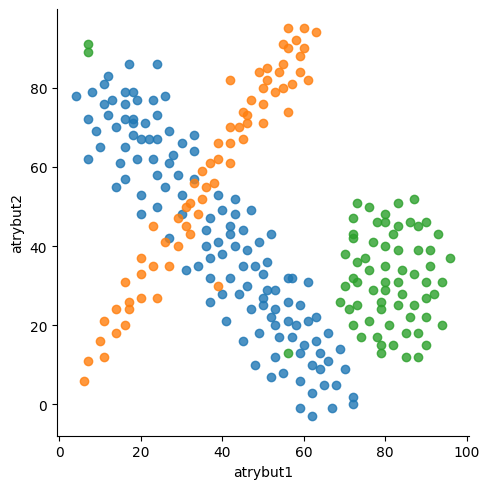

In [11]:
d = pd.read_csv('MED_Lab_dane/dane10.csv')
sns.lmplot( x="atrybut1", y="atrybut2", data=d, fit_reg=False, hue='klasa', legend=False)

Wybieramy podzbiór `klasa 3` i generujemy modeli liniowy.

In [12]:
dd = d[d.klasa == 'klasa 3']
x = dd.iloc[:,0].values.reshape(-1,1)
y = dd.iloc[:,1].values.reshape(-1,1)
print(x.T)
print(y.T)

[[61 66 69 72 62 62 59 55 52 48 45 37 40 41 34 37 31 27 20 14  7  4 17 26
  33 43 47 52 57 63 70 72 67 59 53 59 56 49 51 49 47 46 45 43 40 36 37 33
  30 24 30 36 39 33 18 24 30 27 23 16  7 10 20  9 15 24 12 16 19 24 29 26
  21 18 20 16 16 11 11  8 12 14 18 13 18 16 19 23 22 28 27 24 68 64 64 66
  65 63 59 62 61 58 60 57 56 56 51 53 53 50 48 45 43 42 42 40 39 37 42 44
  46 50 50 52 53 54]]
[[31 18 14  2 -3  3 -1  8  7 10 16 32 28 21 35 26 34 42 48 55 62 78 86 78
  68 52 49 43 32 22  9  0 -1  6 12 25 32 18 36 41 24 39 44 48 49 40 47 64
  53 50 48 44 53 57 79 73 66 69 77 57 72 65 53 69 61 86 83 79 77 67 58 55
  71 68 67 72 76 76 81 79 73 70 71 77 72 65 62 62 67 63 61 58  5  9 13 11
   5 16 13 10 21 20 15 17 21 26 29 24 29 33 35 35 40 45 43 38 41 37 32 28
  30 27 25 22 20 17]]


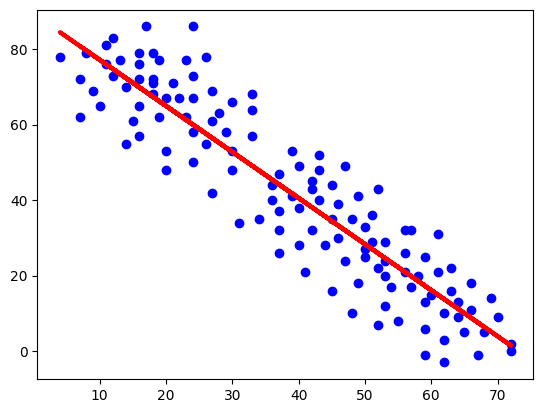

In [13]:
%matplotlib inline
regressor = LinearRegression()  
regressor.fit(x,y) 
y_pred = regressor.predict(x)
plt.scatter(x, y,  color='blue')
plt.plot(x, y_pred, color='red', linewidth=3)
plt.show()


> **Zadanie** Obejrzyj modele dla podzbiorów należących do innych klas. Zwróć szczególną uwage na klasę nr 1.

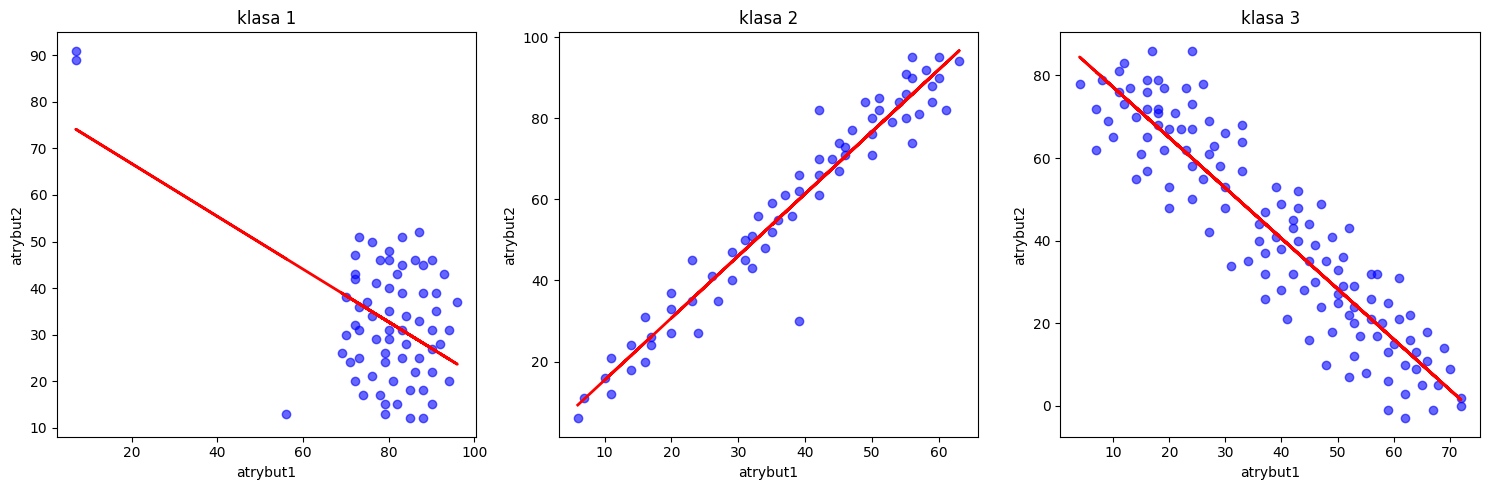

In [14]:
%matplotlib inline
fig, args = plt.subplots(1, 3, figsize=(15, 5))  # lepsze proporcje dla 3 wykresów obok siebie

for klasa in ["klasa 1", "klasa 2", "klasa 3"]:
    dd = d[d.klasa == klasa]
    x = dd.iloc[:,0].values.reshape(-1,1)
    y = dd.iloc[:,1].values.reshape(-1,1)
    
    regressor = LinearRegression()  
    regressor.fit(x, y) 
    y_pred = regressor.predict(x)
    
    idx = int(klasa[-1]) - 1
    args[idx].scatter(x, y, color='blue', alpha=0.6)
    args[idx].plot(x, y_pred, color='red', linewidth=2)
    args[idx].set_title(klasa)
    args[idx].set_xlabel('atrybut1')
    args[idx].set_ylabel('atrybut2')

plt.tight_layout()
plt.show()

# Wnioski
W klasie numer 1 przez rozkład punktów ( bardzo liczne punkty w prawym dolnym rogu, pojedyńcze punkty wypadające bardzo daleko poza zakresem ) spada precyzja przewidywania w całym zakresie. W klasach numer 2 i 3 punkty rozłożone są dość precyzyjnie wokół prostej, więc metoda regresji jest bardzo dokładna.

Badanie modeli regresyjnych z podziałem na zbiór uczący i testowy

In [15]:
dd = d[d.klasa == 'klasa 3']
x = dd.iloc[:,0].values.reshape(-1,1)
y = dd.iloc[:,1].values.reshape(-1,1)
x_ucz, x_test, y_ucz, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

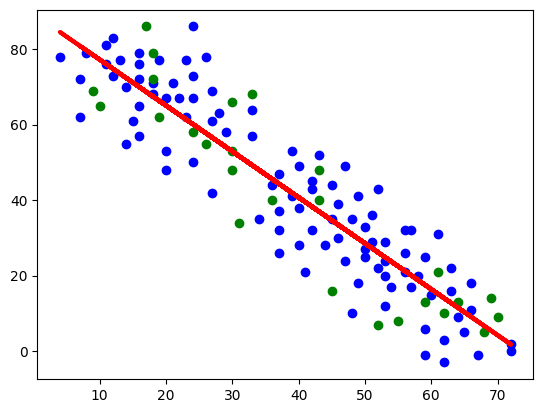

błąd uczenia 97.90961693115158
błąd generalizacji 109.05710100604452


In [16]:
regressor = LinearRegression()  
regressor.fit(x_ucz,y_ucz) 
y_pred_ucz = regressor.predict(x_ucz)
e_ucz = metrics.mean_squared_error(y_ucz, y_pred_ucz)
y_pred_test = regressor.predict(x_test)
e_test = metrics.mean_squared_error(y_test, y_pred_test)
plt.scatter(x_ucz, y_ucz, color='blue')
plt.scatter(x_test, y_test, color='green')
plt.plot(x_ucz, y_pred_ucz, color='red', linewidth=3)
plt.show()
print('błąd uczenia',e_ucz)
print('błąd generalizacji',e_test)

> **Zadanie** Zbadaj błąd uczenia i generalizacji dla wszystkich trzech klas, dla każdej kilkukrotnie powtarzając podział zbioru na uczący i testowy. Oceń stabilość modeli tj. zmienność parametrów modelu dla różnych podziałów. Dla których klas uzyskane modele są bardziej, a dla których - mniej stabilne? Dlaczego?

błąd uczenia przy klasie klasa 1:  143.7605900852357
błąd generalizacji przy klasie klasa 1:  195.55161262816824
błąd uczenia przy klasie klasa 2:  48.45425790798868
błąd generalizacji przy klasie klasa 2:  10.180715401260013
błąd uczenia przy klasie klasa 3:  97.90961693115158
błąd generalizacji przy klasie klasa 3:  109.05710100604452


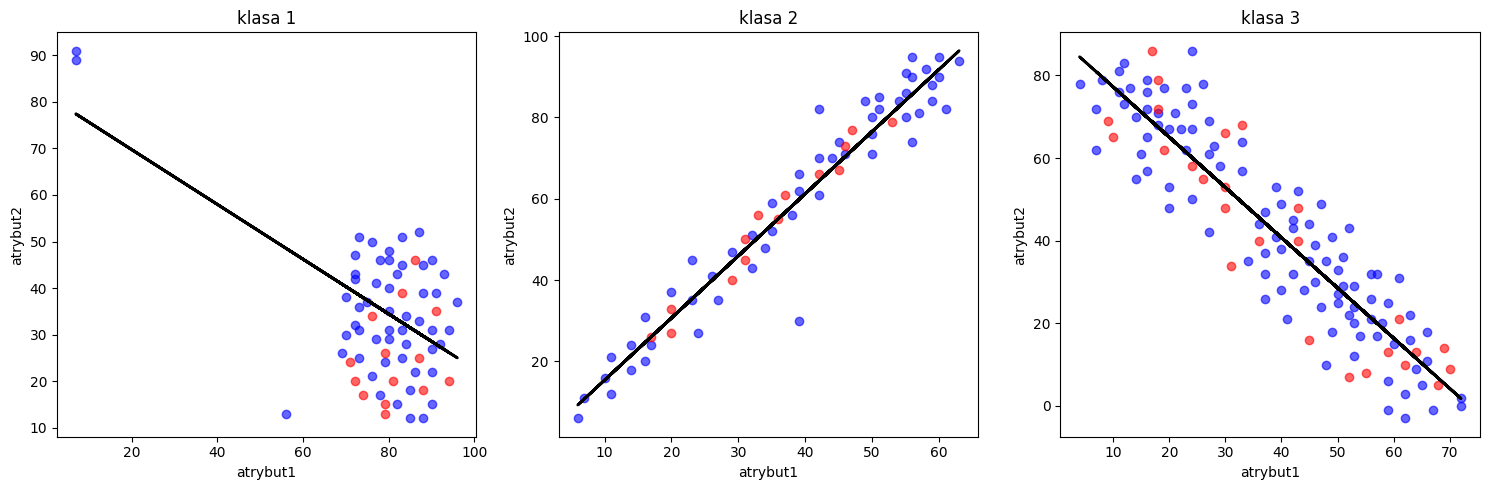

In [17]:
%matplotlib inline
fig, args = plt.subplots(1, 3, figsize=(15, 5))  # lepsze proporcje dla 3 wykresów obok siebie

for klasa in ["klasa 1", "klasa 2", "klasa 3"]:
    dd = d[d.klasa == klasa]
    x = dd.iloc[:,0].values.reshape(-1,1)
    y = dd.iloc[:,1].values.reshape(-1,1)

    
    x_ucz, x_test, y_ucz, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
    
    regressor = LinearRegression()  
    regressor.fit(x_ucz, y_ucz) 
    y_pred_ucz = regressor.predict(x_ucz)
    y_pred_test = regressor.predict(x_test)
    
    idx = int(klasa[-1]) - 1
    args[idx].scatter(x_ucz, y_ucz, color='blue', alpha=0.6)
    args[idx].scatter(x_test, y_test, color='red', alpha=0.6)
    args[idx].plot(x_ucz, y_pred_ucz, color='black', linewidth=2)
    args[idx].set_title(klasa)
    args[idx].set_xlabel('atrybut1')
    args[idx].set_ylabel('atrybut2')

    e_ucz = metrics.mean_squared_error(y_ucz, y_pred_ucz)
    e_test = metrics.mean_squared_error(y_test, y_pred_test)
    print(f'błąd uczenia przy klasie {klasa}: ',e_ucz)
    print(f'błąd generalizacji przy klasie {klasa}: ',e_test)

plt.tight_layout()
plt.show()

# 4. Estymacja parametrów regresji wielomianowej

W przypadku regresji liniowej linia trendu jest linią prostą - jest to szczególny, najprostszy przypadek. W przypadku ogólnym jest to krzywa opisana wielomianem. Współczynniki tego wielomianu mogą być wyznaczane z wykorzystaniem pseudoinwersji, która w efekcie swojego działania minimalizuje sumę kwadratów błędu aproksymacji lub poprzez metody iteracyjnej optymalizacji. Zostało to opisane we wprowadzeniu. Celem tej części laboratorium będzie napisanie programu, który pozwoli na wyznaczenie linii trendu dla punktów zebranych interaktywnie z wykresu. Aproksymatorem będzie w tym przypadku model regresji wielomianowej.  

> **Zadanie** Przy pomocy poniższego kodu wskaż 20 punktów klikając na wykresie tak, by układały się w linię trendu. W efekcie wykonanie poniższego kodu i zebrania punktów otrzymamy ramkę danych z kolumnami x i y. 

In [46]:
# interaktywnie nie zadziałało 
%matplotlib inline
np.random.seed(42)
ile_probek = 50

xx = np.linspace(0.5, 5.5, ile_probek)
yy = 2 + 3*xx + 0.5*xx**2 + np.random.randn(ile_probek)*1.5
df = pd.DataFrame({'x': xx, 'y': yy})

W efekcie udało się pozyskać następującą macierz (ramkę) danych:

In [47]:
print(df.info())
df.head(ile_probek)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       50 non-null     float64
 1   y       50 non-null     float64
dtypes: float64(2)
memory usage: 932.0 bytes
None


,x,y
0,0.500000,4.370071
1,0.602041,3.779953
2,0.704082,5.331643
3,0.806122,7.027829
4,0.908163,4.785640
5,1.010204,5.189663
6,1.112245,8.324098
7,1.214286,7.531254
8,1.316327,6.111126
9,1.418367,8.074825


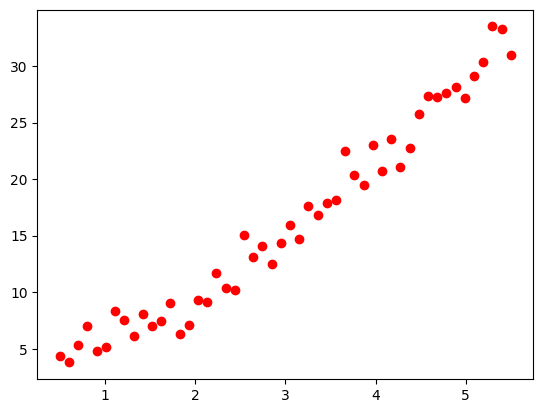

In [48]:
plt.scatter(df.x, df.y, color='red')

> **Zadanie** Napisz funkcję, która utworzy nam macierz $X$. Macierz $X$ powinna składać się z wektora jednostkowego oraz wektorów zawierających poszczególne potęgi zebranych argumentów (opis we wprowadzeniu). Funkcja ta może tworzyć macierz wykorzystując jako parametr wejściowy stopień wielomianu, którym będziemy chcieli dokonywać aproksymacji.

In [49]:
def create_polynomial_matrix(x, degree):
    """Tworzy macierz X dla regresji wielomianowej."""
    x = np.array(x).flatten()
    return np.column_stack([x**i for i in range(degree + 1)])

> **Zadanie** Przy pomocy funkcji pakietu _numpy_ wyliczającej pseudoinwersję _np.linalg.pinv()_ oraz mnożenia macierzy _np.dot()_ wylicz parametry modelu dla zbioru uczącego.

In [50]:
def find_parameters(degree, X):
    Y = df.y.values.reshape(-1, 1)
    X_pinv = np.linalg.pinv(X)
    w = np.dot(X_pinv, Y)
    return w

X = create_polynomial_matrix(df.x, 2)
print(f"\nParametry modelu dla wielomianu stopnia {2} i macierzy\n{X}")
w = find_parameters(2,X)
print(f"w = {w}")
print(f"\nModel: y = {w[0,0]:.4f} + {w[1,0]:.4f}*x + {w[2,0]:.4f}*x^2")


Parametry modelu dla wielomianu stopnia 2 i macierzy
[[ 1.          0.5         0.25      ]
 [ 1.          0.60204082  0.36245314]
 [ 1.          0.70408163  0.49573095]
 [ 1.          0.80612245  0.6498334 ]
 [ 1.          0.90816327  0.82476052]
 [ 1.          1.01020408  1.02051229]
 [ 1.          1.1122449   1.23708871]
 [ 1.          1.21428571  1.4744898 ]
 [ 1.          1.31632653  1.73271554]
 [ 1.          1.41836735  2.01176593]
 [ 1.          1.52040816  2.31164098]
 [ 1.          1.62244898  2.63234069]
 [ 1.          1.7244898   2.97386506]
 [ 1.          1.82653061  3.33621408]
 [ 1.          1.92857143  3.71938776]
 [ 1.          2.03061224  4.12338609]
 [ 1.          2.13265306  4.54820908]
 [ 1.          2.23469388  4.99385673]
 [ 1.          2.33673469  5.46032903]
 [ 1.          2.43877551  5.94762599]
 [ 1.          2.54081633  6.45574761]
 [ 1.          2.64285714  6.98469388]
 [ 1.          2.74489796  7.53446481]
 [ 1.          2.84693878  8.10506039]
 [ 1.     

> **Zadanie** 
1. Wyświetl na pojedynczym wykresie, punkty danych oraz linie trendów dla wielomianów stopnia 1, 2, 3, 4 i 5.
2. Wyświetl wykres średniokwadratowego błędu dopasowania krzywej do punktów danych, w funkcji złożoności modelu (stopnia wielomianu). Czym się ta funkcja charakteryzuje ?


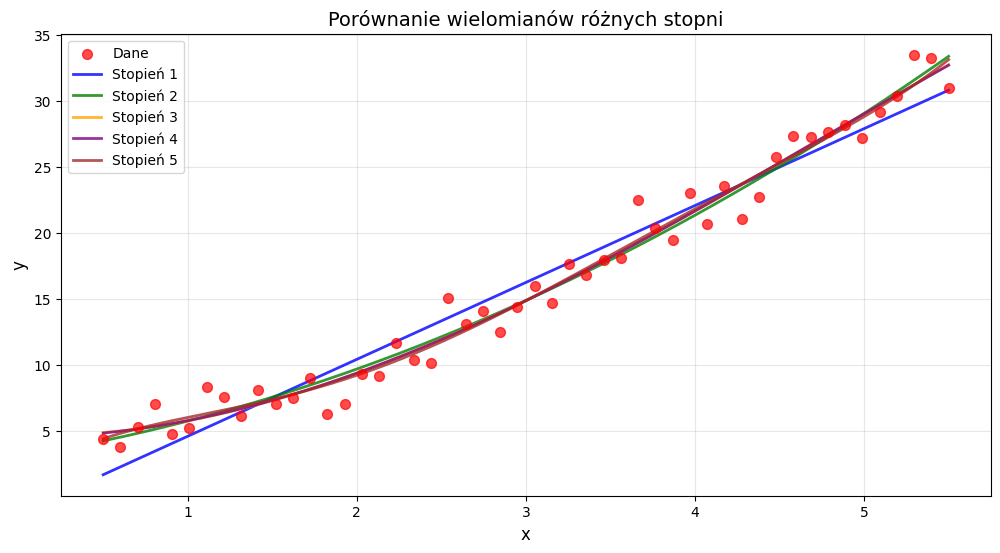

In [51]:
# Zadanie 1: Wizualizacja wielomianów różnych stopni
%matplotlib inline
plt.figure(figsize=(12, 6))
plt.scatter(df.x, df.y, color='red', s=50, alpha=0.7, label='Dane', zorder=5)
x_smooth = np.linspace(df.x.min(), df.x.max(), 300)
colors = ['blue', 'green', 'orange', 'purple', 'brown']
degrees = [1, 2, 3, 4, 5]
for degree, color in zip(degrees, colors):
    X = create_polynomial_matrix(df.x, degree)
    Y = df.y.values.reshape(-1, 1)
    X_pinv = np.linalg.pinv(X)
    w = np.dot(X_pinv, Y)
    X_smooth = create_polynomial_matrix(x_smooth, degree)
    y_smooth = np.dot(X_smooth, w)
    plt.plot(x_smooth, y_smooth, color=color, linewidth=2, 
             label=f'Stopień {degree}', alpha=0.8)

plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('Porównanie wielomianów różnych stopni', fontsize=14)
plt.legend(loc='best')
plt.grid(True, alpha=0.3)
plt.show()

Stopień 1: MSE = 3.2785
Stopień 2: MSE = 1.7945
Stopień 3: MSE = 1.7219
Stopień 4: MSE = 1.7216
Stopień 5: MSE = 1.6915
Stopień 6: MSE = 1.5932
Stopień 7: MSE = 1.5818
Stopień 8: MSE = 1.5806
Stopień 9: MSE = 1.5143
Stopień 10: MSE = 1.5096


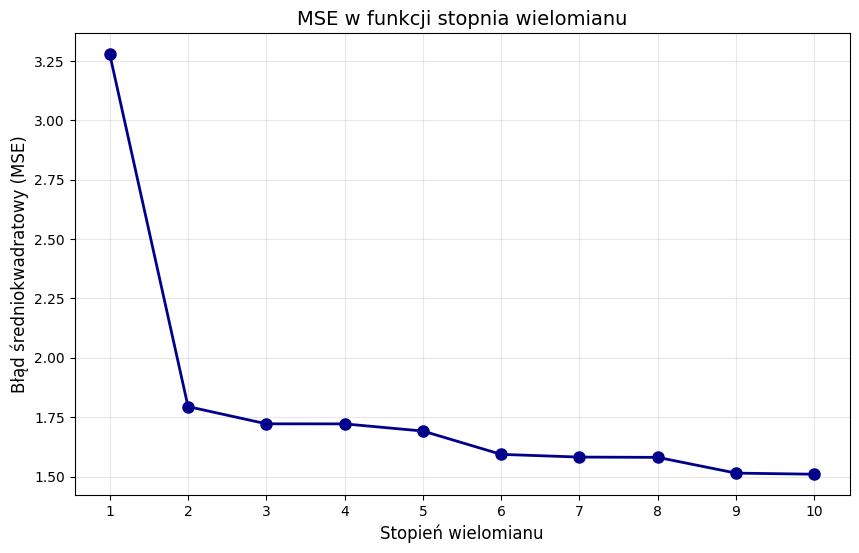

In [52]:
degrees_range = range(1, 11)  # Stopnie od 1 do 10
mse_values = []

for degree in degrees_range:
    X = create_polynomial_matrix(df.x, degree)
    Y = df.y.values.reshape(-1, 1)
    X_pinv = np.linalg.pinv(X)
    w = np.dot(X_pinv, Y)
    y_pred = np.dot(X, w)
    mse = metrics.mean_squared_error(Y, y_pred)
    mse_values.append(mse)
    print(f'Stopień {degree}: MSE = {mse:.4f}')

plt.figure(figsize=(10, 6))
plt.plot(degrees_range, mse_values, 'o-', color='darkblue', linewidth=2, markersize=8)
plt.xlabel('Stopień wielomianu', fontsize=12)
plt.ylabel('Błąd średniokwadratowy (MSE)', fontsize=12)
plt.title('MSE w funkcji stopnia wielomianu', fontsize=14)
plt.grid(True, alpha=0.3)
plt.xticks(degrees_range)
plt.show()

> **Zadanie** Zajdź funkcię wbudowaną pakietu `numpy`, która zwraca wartości współczynników wielomianu dla zadanych punktów (czyli realizuje to co powyżej udało się zrobić "ręcznie").

Stopień wielomianu: 2

Metoda ręczna (pseudoinwersja):
  w = [[3.061464  ]
 [2.0550854 ]
 [0.62849407]]
  Model: y = 3.0615 + 2.0551*x + 0.6285*x²

Metoda np.polyfit():
  w = [0.62849407 2.0550854  3.061464  ]
  Model: y = 3.0615 + 2.0551*x + 0.6285*x²


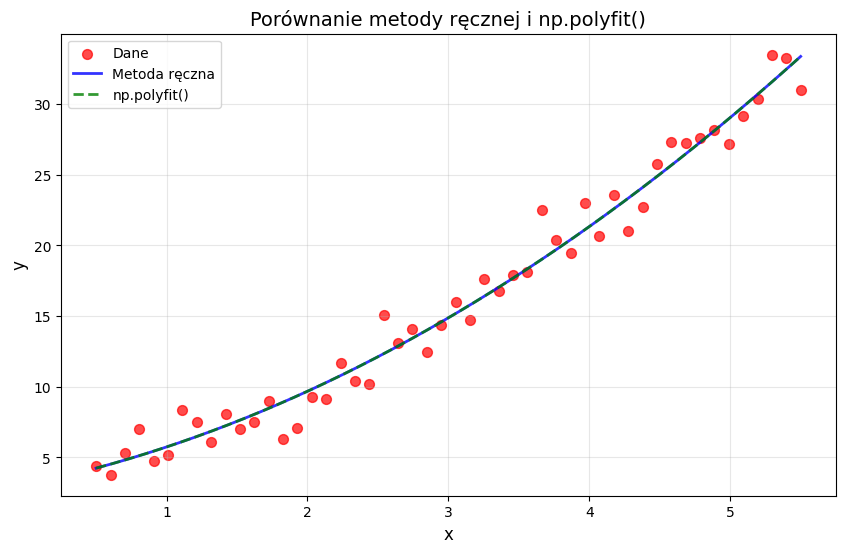

In [59]:
degree = 2

# Metoda ręczna (z poprzedniego zadania)
X = create_polynomial_matrix(df.x, degree)
w_manual = find_parameters(degree, X)

# Metoda wbudowana numpy
w_polyfit = np.polyfit(df.x, df.y, degree)

print(f"Stopień wielomianu: {degree}\n")
print("Metoda ręczna (pseudoinwersja):")
print(f"  w = {w_manual}")
print(f"  Model: y = {w_manual[0,0]:.4f} + {w_manual[1,0]:.4f}*x + {w_manual[2,0]:.4f}*x²\n")

print("Metoda np.polyfit():")
print(f"  w = {w_polyfit}")
print(f"  Model: y = {w_polyfit[2]:.4f} + {w_polyfit[1]:.4f}*x + {w_polyfit[0]:.4f}*x²")

# Wizualizacja - porównanie obu metod
plt.figure(figsize=(10, 6))
plt.scatter(df.x, df.y, color='red', s=50, alpha=0.7, label='Dane')

x_smooth = np.linspace(df.x.min(), df.x.max(), 300)

# Predykcja metodą ręczną
X_smooth = create_polynomial_matrix(x_smooth, degree)
y_smooth_manual = np.dot(X_smooth, w_manual)

# Predykcja używając np.polyval() (funkcja towarzysząca do np.polyfit())
y_smooth_polyfit = np.polyval(w_polyfit, x_smooth)

plt.plot(x_smooth, y_smooth_manual, 'b-', linewidth=2, label='Metoda ręczna', alpha=0.8)
plt.plot(x_smooth, y_smooth_polyfit, 'g--', linewidth=2, label='np.polyfit()', alpha=0.8)

plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('Porównanie metody ręcznej i np.polyfit()', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

> **Zadanie** Podziel zbiór na uczacy i testowy, a następnie powtórz wcześniejszy eksperyment z uwzględnieniem tego podziału. W szczególności: 
1. Wyświetl na pojedynczym wykresie, punkty danych oraz linie trendów dla wielomianów kilku wybranych stopni wyznaczonych dla zbioru uczącego.
2. Wyświetl wykres błędu uczenia (tj. dopasowania punktów zbioru uczącego) i generalizacji (tj. dopasowania punktów zbioru testowego) w funkcji złożoności modelu (stopnia wielomianu).
3. Wybierz stopień wielomianu, który najlepiej opisuje Twoje punkty danych z uwzględnieniem podziału na zbiór uczący i testowy. Co należy uwzględnić dokonując takiego wyboru ?

Rozmiar zbioru uczącego: 35
Rozmiar zbioru testowego: 15


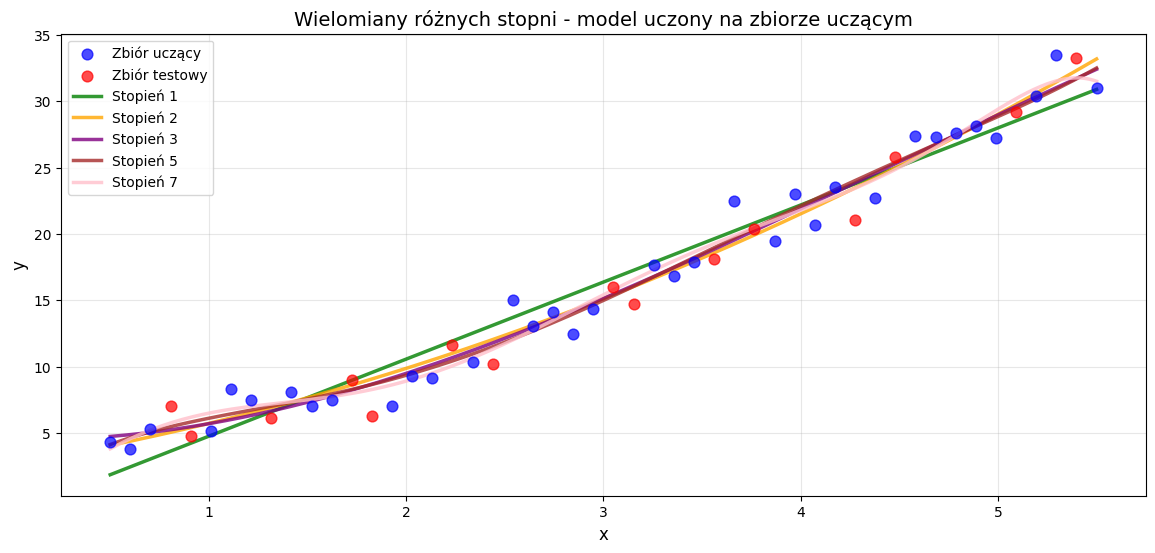

In [63]:
x_ucz, x_test, y_ucz, y_test = train_test_split(df.x, df.y, test_size=0.3, random_state=42)

print(f"Rozmiar zbioru uczącego: {len(x_ucz)}")
print(f"Rozmiar zbioru testowego: {len(x_test)}")

plt.figure(figsize=(14, 6))
plt.scatter(x_ucz, y_ucz, color='blue', s=60, alpha=0.7, label='Zbiór uczący', zorder=5)
plt.scatter(x_test, y_test, color='red', s=60, alpha=0.7, label='Zbiór testowy', zorder=5)
x_smooth = np.linspace(df.x.min(), df.x.max(), 300)
colors = ['green', 'orange', 'purple', 'brown', 'pink']
degrees = [1, 2, 3, 5, 7]

for degree, color in zip(degrees, colors):
    X_ucz = create_polynomial_matrix(x_ucz, degree)
    Y_ucz = y_ucz.values.reshape(-1, 1)
    X_pinv = np.linalg.pinv(X_ucz)
    w = np.dot(X_pinv, Y_ucz)
    X_smooth = create_polynomial_matrix(x_smooth, degree)
    y_smooth = np.dot(X_smooth, w)
    plt.plot(x_smooth, y_smooth, color=color, linewidth=2.5, 
             label=f'Stopień {degree}', alpha=0.8)

plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('Wielomiany różnych stopni - model uczony na zbiorze uczącym', fontsize=14)
plt.legend(loc='best', fontsize=10)
plt.grid(True, alpha=0.3)
plt.show()

Stopień  1: MSE uczenia =   3.0338, MSE generalizacji =   3.9109
Stopień  2: MSE uczenia =   1.8260, MSE generalizacji =   1.8176
Stopień  3: MSE uczenia =   1.7214, MSE generalizacji =   1.8365
Stopień  4: MSE uczenia =   1.7026, MSE generalizacji =   1.9187
Stopień  5: MSE uczenia =   1.6677, MSE generalizacji =   1.9005
Stopień  6: MSE uczenia =   1.5396, MSE generalizacji =   1.8603
Stopień  7: MSE uczenia =   1.5076, MSE generalizacji =   1.9012
Stopień  8: MSE uczenia =   1.5063, MSE generalizacji =   1.9188
Stopień  9: MSE uczenia =   1.3931, MSE generalizacji =   1.9329
Stopień 10: MSE uczenia =   1.3908, MSE generalizacji =   1.9275
Stopień 11: MSE uczenia =   1.3716, MSE generalizacji =   1.8755
Stopień 12: MSE uczenia =   0.9948, MSE generalizacji =   2.9459
Stopień 13: MSE uczenia =   0.9052, MSE generalizacji =   3.3558
Stopień 14: MSE uczenia =   0.9129, MSE generalizacji =   3.3072
Stopień 15: MSE uczenia =   0.8910, MSE generalizacji =   2.8897


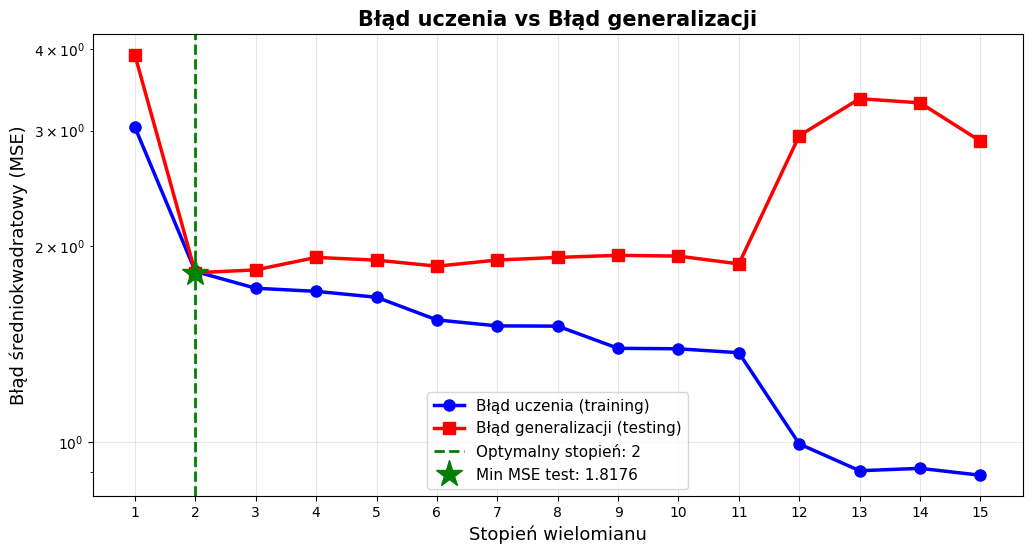

In [ ]:
# Zadanie 2: Wykres błędu uczenia i generalizacji w funkcji stopnia wielomianu
degrees_range = range(1, 16)
mse_train = []
mse_test = []

for degree in degrees_range:
    X_ucz = create_polynomial_matrix(x_ucz, degree)
    Y_ucz = y_ucz.values.reshape(-1, 1)
    
    X_pinv = np.linalg.pinv(X_ucz)
    w = np.dot(X_pinv, Y_ucz)
    
    # Predykcja dla zbioru uczącego (błąd uczenia)
    y_pred_ucz = np.dot(X_ucz, w)
    mse_u = metrics.mean_squared_error(Y_ucz, y_pred_ucz)
    mse_train.append(mse_u)
    
    # Predykcja dla zbioru testowego (błąd generalizacji)
    X_test = create_polynomial_matrix(x_test, degree)
    Y_test = y_test.values.reshape(-1, 1)
    y_pred_test = np.dot(X_test, w)
    mse_t = metrics.mean_squared_error(Y_test, y_pred_test)
    mse_test.append(mse_t)
    
    print(f'Stopień {degree:2d}: MSE uczenia = {mse_u:8.4f}, MSE generalizacji = {mse_t:8.4f}')

# Wykres porównawczy
plt.figure(figsize=(12, 6))
plt.plot(degrees_range, mse_train, 'o-', color='blue', linewidth=2.5, 
         markersize=8, label='Błąd uczenia (training)')
plt.plot(degrees_range, mse_test, 's-', color='red', linewidth=2.5, 
         markersize=8, label='Błąd generalizacji (testing)')

# Znajdowanie optymalnego stopnia (min MSE testowego)
optimal_degree = degrees_range[np.argmin(mse_test)]
min_mse_test = min(mse_test)
plt.axvline(x=optimal_degree, color='green', linestyle='--', linewidth=2, 
            label=f'Optymalny stopień: {optimal_degree}')
plt.plot(optimal_degree, min_mse_test, 'g*', markersize=20, label=f'Min MSE test: {min_mse_test:.4f}')

plt.xlabel('Stopień wielomianu', fontsize=13)
plt.ylabel('Błąd średniokwadratowy (MSE)', fontsize=13)
plt.title('Błąd uczenia vs Błąd generalizacji', fontsize=15, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.xticks(degrees_range)
plt.yscale('log')
plt.show()

3. Wybierz stopień wielomianu, który najlepiej opisuje Twoje punkty danych z uwzględnieniem podziału na zbiór uczący i testowy. Co należy uwzględnić dokonując takiego wyboru ?


> **Zadanie** Odpowiedz na następujące pytania sprawdzające:
1. Czy jesteśmy w stanie zminimalizować błąd uczenia do 0, jeśli tak to jaki warunek musi być spełniony?
2. Czy powinniśmy tak dobierać stopień wielomianu aby błąd uczenia był jak najmniejszy?
3. Czy równanie zawsze posiada rozwiązanie przybliżone?
4. Co się dzieje z wielkością parametrów modelu w miarę zwiększania stopnia wielomianu?

- 1. Tak moglibyśmy, przy stopniu większym od liczby punktów w zbiorze uczącym , lub jeśli znajdują się one na wykresie jednej funkcji o niższym stopniu.
- 2. Nie powinniśmy przesadza,ć, bo może dojść do błędu generalizacji, lub zjawiska overfittingu.
- 3. Tak, poza macierzami źle uwarunkowanymi gdzie może być niestabilne.
- 4. Zakres ich wartości będzie rósł wraz ze wzrostem stopnia, ponieważ wysokie współczynniki są sposobem na kompensację wysokich potęg, oraz uwarunkowanie macierzy pogarsza się, może to prowadzić do overfittingu.